# Pie图&布局

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

* paches,texts,autotexts = plt.pie(...)

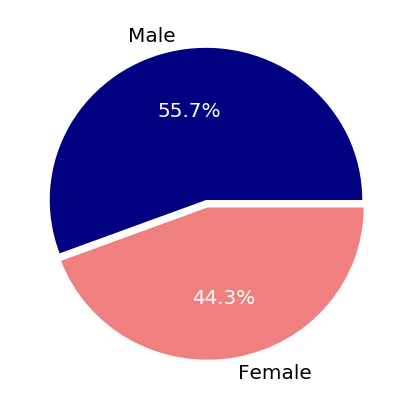

In [34]:
m = 51212.  #m为male
f = 40742.  #f为female
m_perc = m/(m+f)
f_perc = f/(m+f)

colors = ['navy','lightcoral']
labels = ["Male","Female"]

plt.figure(figsize=(7,7))
paches,texts,autotexts = plt.pie([m_perc,f_perc],labels = labels,autopct = '%1.1f%%'
                                 ,explode=[0,0.05],colors = colors)
#pie里面第一个参数也可以直接是值([m,f])，pie图会自动计算所占百分比
#autopct = '%1.1f%%'在图中显示的是百分位的结果；autopct = 'explode=[0,0.05]'为指定各个pi间的分离程度

# 调整字体大小和颜色
for text in texts+autotexts:  #texts指Male和Female
    text.set_fontsize(20)
for text in autotexts:  #autotexts是百分比
    text.set_color('white')

### 设置子图布局
* plt.subplot2grid((),(),rowspan = ,colspan = )

其中第一个参数是总画布的布局，第二个参数是子画布的初始布局位置
rowspan和colspan分别定义列延伸或者行延伸几格，默认为1

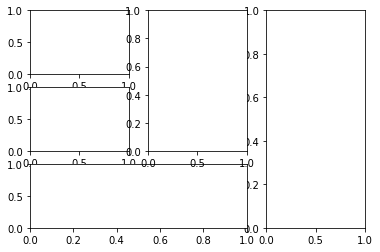

In [11]:
ax1 = plt.subplot2grid((3,3),(0,0))
ax2 = plt.subplot2grid((3,3),(1,0))
ax3 = plt.subplot2grid((3,3),(0,2),rowspan=3)
ax4 = plt.subplot2grid((3,3),(2,0),colspan = 2)
ax5 = plt.subplot2grid((3,3),(0,1),rowspan=2)

### 嵌套图
* ax2 = fig.add_axes()

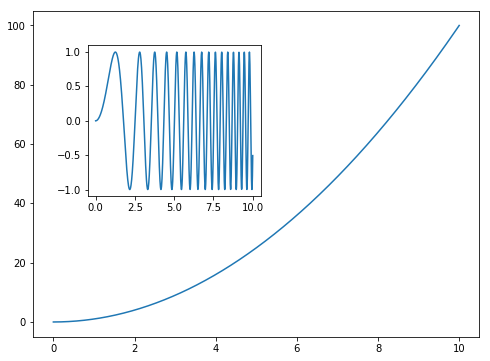

In [26]:
import numpy as np

x = np.linspace(0,10,1000)
y2 = np.sin(x**2)
y1 = x**2

fig,ax1 = plt.subplots(figsize = (8,6))

left,bottom,width,height = [0.22,0.45,0.3,0.35] 
# 需要在大图中嵌套一个小图，所以需要指定小图的位置
#这四个参数理解为前两个先确定图的坐标位置(即(0.22，0.45)),后两个参数确定图的宽度和高度
ax2 = fig.add_axes([left,bottom,width,height])

ax1.plot(x,y1)
ax2.plot(x,y2)

## 用工具绘制子图
* from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

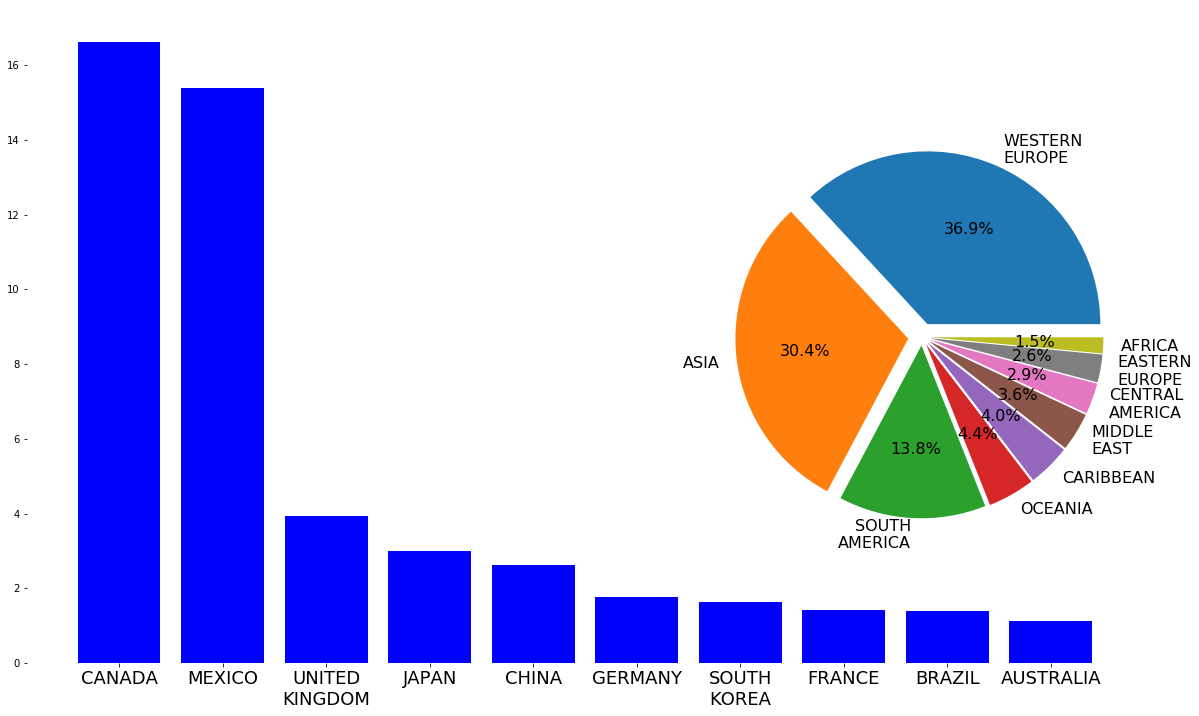

In [35]:
top10_arrivals_countries = ['CANADA','MEXICO','UNITED\nKINGDOM',\
                            'JAPAN','CHINA','GERMANY','SOUTH\nKOREA',\
                            'FRANCE','BRAZIL','AUSTRALIA']
top10_arrivals_values = [16.625687, 15.378026, 3.934508, 2.999718,\
                         2.618737, 1.769498, 1.628563, 1.419409,\
                         1.393710, 1.136974]
arrivals_countries = ['WESTERN\nEUROPE','ASIA','SOUTH\nAMERICA',\
                      'OCEANIA','CARIBBEAN','MIDDLE\nEAST',\
                      'CENTRAL\nAMERICA','EASTERN\nEUROPE','AFRICA']
arrivals_percent = [36.9,30.4,13.8,4.4,4.0,3.6,2.9,2.6,1.5]

fig, ax1 = plt.subplots(figsize=(20,12))
LOMO = ax1.bar(range(10),top10_arrivals_values,color='blue') #画条形图
plt.xticks(range(10),top10_arrivals_countries,fontsize=18) #将x轴的数字改为具体的名字

ax2 = inset_axes(ax1,width = 6,height = 6,loc = 5)   #使用inset_axes(ax1,...)，在ax1的基础上嵌套一个ax2

explode = (0.08, 0.08, 0.05, 0.05,0.05,0.05,0.05,0.05,0.05)
patches, texts, autotexts = ax2.pie(arrivals_percent,labels=arrivals_countries,autopct='%1.1f%%',explode=explode) #画pie图

for text in texts+autotexts: #将pie图的字体调大一些
    text.set_fontsize(16)
for spine in ax1.spines.values():  #不展示轴
    spine.set_visible(False)

### 上述图的基础上，在每个条形图上面加具体的标注

自定义了一个 autolabel的函数，可直接调用

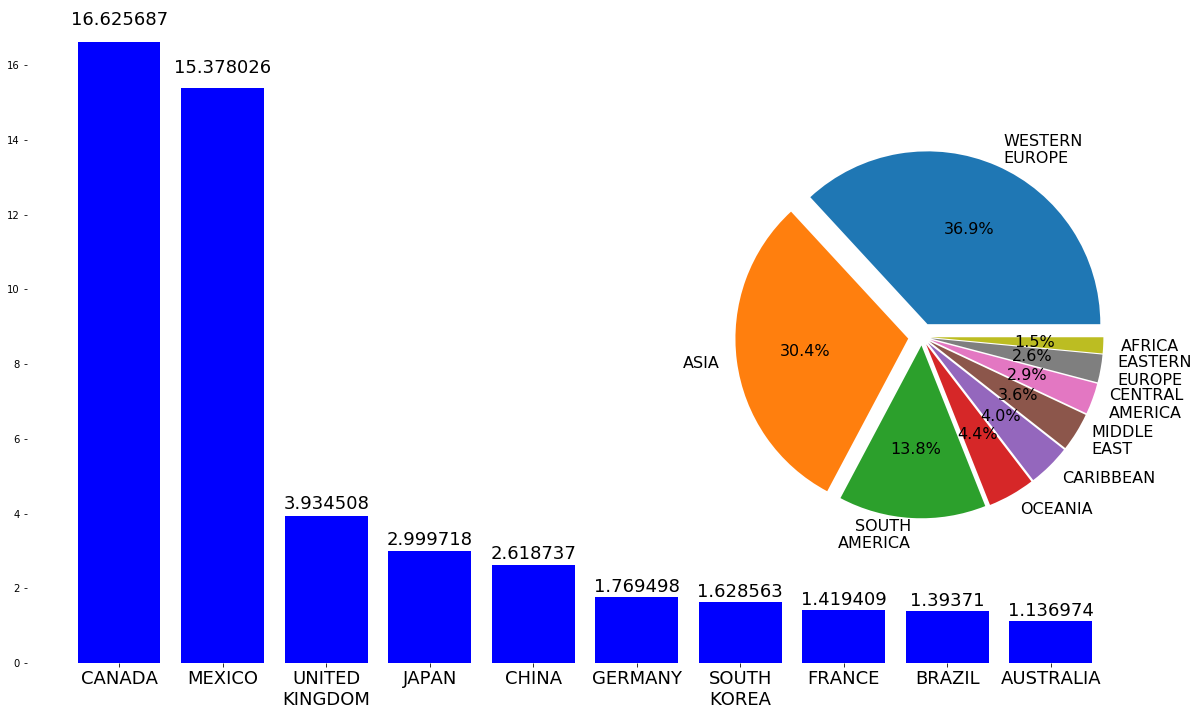

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def autolabel(rects):    #直接往此函数里面传入图(条形图)即可加指标
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
        "{:,}".format(float(height)),
        ha='center', va='bottom',fontsize=18)
        
top10_arrivals_countries = ['CANADA','MEXICO','UNITED\nKINGDOM',\
                            'JAPAN','CHINA','GERMANY','SOUTH\nKOREA',\
                            'FRANCE','BRAZIL','AUSTRALIA']
top10_arrivals_values = [16.625687, 15.378026, 3.934508, 2.999718,\
                         2.618737, 1.769498, 1.628563, 1.419409,\
                         1.393710, 1.136974]
arrivals_countries = ['WESTERN\nEUROPE','ASIA','SOUTH\nAMERICA',\
                      'OCEANIA','CARIBBEAN','MIDDLE\nEAST',\
                      'CENTRAL\nAMERICA','EASTERN\nEUROPE','AFRICA']
arrivals_percent = [36.9,30.4,13.8,4.4,4.0,3.6,2.9,2.6,1.5]

fig, ax1 = plt.subplots(figsize=(20,12))
LOMO = ax1.bar(range(10),top10_arrivals_values,color='blue')
plt.xticks(range(10),top10_arrivals_countries,fontsize=18)
ax2 = inset_axes(ax1,width = 6,height = 6,loc = 5)
explode = (0.08, 0.08, 0.05, 0.05,0.05,0.05,0.05,0.05,0.05)
patches, texts, autotexts = ax2.pie(arrivals_percent,labels=arrivals_countries,autopct='%1.1f%%',explode=explode)

for text in texts+autotexts:
    text.set_fontsize(16)
for spine in ax1.spines.values():
    spine.set_visible(False)

autolabel(LOMO)   #LOMO是ax1.bar(range(10),top10_arrivals_values,color='blue')

### 指定特殊的形状

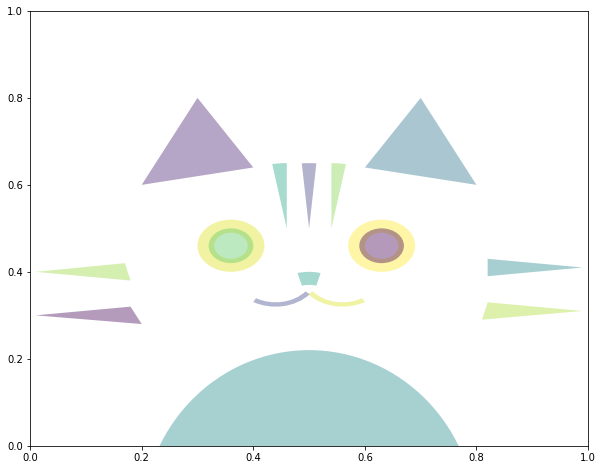

In [40]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,8))

patches = []

# Full and ring sectors drawn by Wedge((x,y),r,deg1,deg2)
leftstripe = Wedge((.46, .5), .15, 90,100)           # Full sector by default
midstripe = Wedge((.5,.5), .15, 85,95)                      
rightstripe = Wedge((.54,.5), .15, 80,90)
lefteye = Wedge((.36, .46), .06, 0, 360, width=0.03)  # Ring sector drawn when width <1
righteye = Wedge((.63, .46), .06, 0, 360, width=0.03)
nose = Wedge((.5, .32), .08, 75,105, width=0.03)
mouthleft = Wedge((.44, .4), .08, 240,320, width=0.01)
mouthright = Wedge((.56, .4), .08, 220,300, width=0.01)
patches += [leftstripe,midstripe,rightstripe,lefteye,righteye,nose,mouthleft,mouthright]

# Circles
leftiris = Circle((.36,.46),0.04)
rightiris = Circle((.63,.46),0.04)
patches += [leftiris,rightiris]

# Polygons drawn by passing coordinates of vertices
leftear = Polygon([[.2,.6],[.3,.8],[.4,.64]], True)
rightear = Polygon([[.6,.64],[.7,.8],[.8,.6]], True)
topleftwhisker = Polygon([[.01,.4],[.18,.38],[.17,.42]], True)
bottomleftwhisker = Polygon([[.01,.3],[.18,.32],[.2,.28]], True)
toprightwhisker = Polygon([[.99,.41],[.82,.39],[.82,.43]], True)
bottomrightwhisker = Polygon([[.99,.31],[.82,.33],[.81,.29]], True)
patches+=[leftear,rightear,topleftwhisker,bottomleftwhisker,toprightwhisker,bottomrightwhisker]

# Ellipse drawn by Ellipse((x,y),width,height)
body = Ellipse((0.5,-0.18),0.6,0.8)
patches.append(body)

# Draw the patches
colors = 100*np.random.rand(len(patches)) # set random colors
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

# Show the figure
plt.show()